In [2]:
import xarray as xr
import act
%pylab inline

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
clusters = xr.open_dataset('Clusters_new10.nc')
clusters

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:         (time: 25821)
Coordinates:
  * time            (time) datetime64[ns] 2017-07-31T18:01:14.540000 ... 2017...
Data variables:
    classification  (time) int32 ...

In [4]:
lidar_data = xr.open_mfdataset('/lcrc/group/earthscience/rjackson/sgp_lidar/coverage_product/sgpdlscp*.nc')
lidar_data

<xarray.Dataset>
Dimensions:                      (time: 25821, range: 199, snr_bins: 49,
                                  vel_bins: 79)
Coordinates:
  * time                         (time) datetime64[ns] 2017-07-31T18:01:14.54...
  * snr_bins                     (snr_bins) float64 1.0 2.0 3.0 ... 48.0 49.0
  * vel_bins                     (vel_bins) float64 -20.0 -19.5 ... 18.5 19.0
Dimensions without coordinates: range
Data variables: (12/14)
    snrgt1.000000                (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    snr_hist                     (time, range, snr_bins) float64 dask.array<chunksize=(19, 199, 49), meta=np.ndarray>
    vel_hist                     (time, range, vel_bins) float64 dask.array<chunksize=(19, 199, 79), meta=np.ndarray>
    snrgt3.000000                (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    snrgt5.000000                (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    snrgt10.000000               (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    ...                           ...
    doppler_velocitygt3.000000   (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    doppler_velocitygt5.000000   (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    doppler_velocitygt10.000000  (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    doppler_velocitygt20.000000  (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>
    Time                         (time) datetime64[ns] dask.array<chunksize=(19,), meta=np.ndarray>
    range_bins                   (time, range) float64 dask.array<chunksize=(19, 199), meta=np.ndarray>

In [5]:
clusters = clusters.reindex(time=lidar_data.time, method='nearest')
clusters

<xarray.Dataset>
Dimensions:         (time: 25821)
Coordinates:
  * time            (time) datetime64[ns] 2017-07-31T18:01:14.540000 ... 2017...
Data variables:
    classification  (time) int32 8 8 8 8 8 8 8 8 8 8 8 ... 5 5 5 5 5 5 5 5 5 5 5

In [6]:
lidar_data.load()

<xarray.Dataset>
Dimensions:                      (time: 25821, range: 199, snr_bins: 49,
                                  vel_bins: 79)
Coordinates:
  * time                         (time) datetime64[ns] 2017-07-31T18:01:14.54...
  * snr_bins                     (snr_bins) float64 1.0 2.0 3.0 ... 48.0 49.0
  * vel_bins                     (vel_bins) float64 -20.0 -19.5 ... 18.5 19.0
Dimensions without coordinates: range
Data variables: (12/14)
    snrgt1.000000                (time, range) float64 0.0 100.0 ... 0.0 0.0
    snr_hist                     (time, range, snr_bins) float64 0.0 0.0 ... 0.0
    vel_hist                     (time, range, vel_bins) float64 0.0 0.0 ... 0.0
    snrgt3.000000                (time, range) float64 0.0 100.0 ... 0.0 0.0
    snrgt5.000000                (time, range) float64 0.0 100.0 ... 0.0 0.0
    snrgt10.000000               (time, range) float64 0.0 0.0 2.703 ... 0.0 0.0
    ...                           ...
    doppler_velocitygt3.000000   (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0
    doppler_velocitygt5.000000   (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0
    doppler_velocitygt10.000000  (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0
    doppler_velocitygt20.000000  (time, range) float64 0.0 0.0 0.0 ... 0.0 0.0
    Time                         (time) datetime64[ns] 2017-07-31T18:01:14.54...
    range_bins                   (time, range) float64 0.0 60.0 ... 1.188e+04

In [9]:
time_bins = np.arange(0., 25.)
snr_means = np.zeros((9, 24, 199))
hours = clusters.time.dt.hour - 5
hours[hours < 0] = hours[hours < 0] + 24
for i in range(6):
    for j in range(24):
        inds = np.argwhere(np.logical_and.reduce(
            (clusters.classification.values == i, hours >= time_bins[j], hours < time_bins[j+1])))
        for k in range(199):
            snr_means[i, j, k] = np.nanmean(lidar_data["snrgt5.000000"].values[inds, k])
            #snr_means[i, j, k] = snr_means[i, j, k]/np.nansum(lidar_data.snr_hist.values[inds, k, :])
snr_means[snr_means == 0] = np.nan

/tmp/ipykernel_1844854/1132730637.py:10: RuntimeWarning: Mean of empty slice
  snr_means[i, j, k] = np.nanmean(lidar_data["snrgt5.000000"].values[inds, k])


/tmp/ipykernel_1844854/398474993.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[0,0].pcolormesh(x, y, snr_means[0].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
/tmp/ipykernel_1844854/398474993.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[1,0].pcolormesh(x, y, snr_means[1].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
/tmp/ipykernel_1844854/398474993.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same d

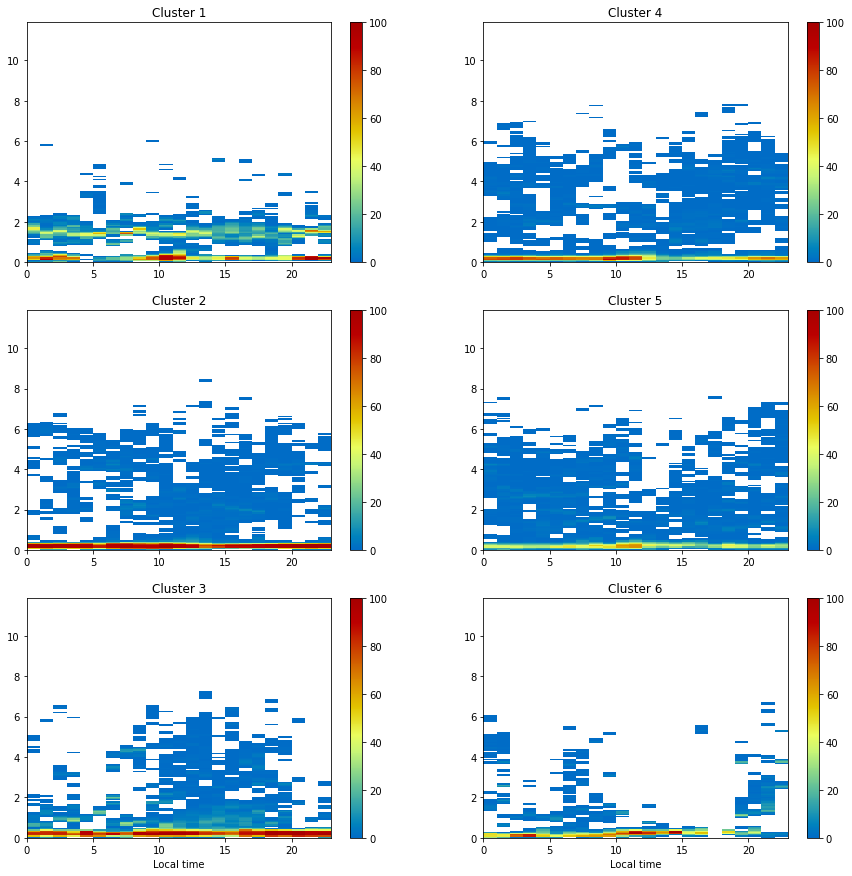

In [10]:
x, y = np.meshgrid(time_bins[:-1], lidar_data.range_bins[0].values/1e3)
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
c = ax[0,0].pcolormesh(x, y, snr_means[0].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[0,0].set_title('Cluster 1')
ax[2,0].set_xlabel('Local time')
ax[2,1].set_xlabel('Local time')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[0,0])
c = ax[1,0].pcolormesh(x, y, snr_means[1].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[1,0].set_title('Cluster 2')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[1,0])
c = ax[2,0].pcolormesh(x, y, snr_means[2].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[2,0].set_title('Cluster 3')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[2,0])
c = ax[0,1].pcolormesh(x, y, snr_means[3].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[0,1].set_title('Cluster 4')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[0,1])
c = ax[1,1].pcolormesh(x, y, snr_means[4].T, vmin=0, vmax=100,cmap='act_HomeyerRainbow')
ax[1,1].set_title('Cluster 5')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[1,1])
c = ax[2,1].pcolormesh(x, y, snr_means[5].T, vmin=0, vmax=100, cmap='act_HomeyerRainbow')
ax[2,1].set_title('Cluster 6')
#c.set_clim([0, 30])
cax = plt.colorbar(c, ax=ax[2,1])

In [8]:
cfads = np.zeros((10, 199, 49))
for i in range(10):
    inds = np.argwhere(np.logical_and.reduce((clusters.classification.values == i, )))
    for j in range(0, 199):
        cfads[i, j, :] = lidar_data.snr_hist.values[inds, j, :].sum(axis=0)
        cfads[i, j, :] = cfads[i, j, :]
levels = np.arange(-1, 1, 0.5)

In [9]:
levels = np.arange(-2, 2, 0.5)
levels

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

(10, 199, 49)


/tmp/ipykernel_2178075/1126473453.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax[i, j].pcolormesh(y, x, np.log10(cfads[cluster].T), vmin=-2, vmax=2, cmap='Greys')


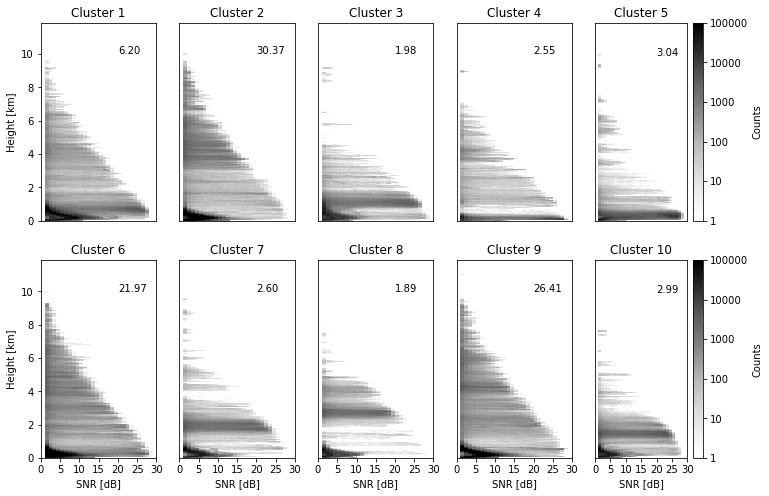

In [10]:
x_label = 'SNR [dB]'
x, y = np.meshgrid(lidar_data.range_bins[0].values/1e3, lidar_data.snr_bins.values[:])
cfads = np.where(cfads > 0.01, cfads, np.nan)
cfads = cfads[:, :, :]
print(cfads.shape)
fig, ax = plt.subplots(2, 5, figsize=(12, 8))
cluster = 0
for i in range(2):
    for j in range(5):
        if cluster == 10:
            continue
        inds = np.argwhere(np.logical_and.reduce((clusters.classification.values == cluster, )))
        pct_in_cluster = len(inds)/(len(clusters.classification.values)) * 100
        c = ax[i, j].pcolormesh(y, x, np.log10(cfads[cluster].T), vmin=-2, vmax=2, cmap='Greys')
        c.set_clim([0, 5])
        ax[i, j].set_xlim([-0, 30])
        if j > 0:
            ax[i, j].set_yticks([])
        else:
            ax[i, j].set_ylabel('Height [km]')
        if i < 1:
            ax[i, j].set_xticks([])
        else:
            ax[i, j].set_xticks([0, 5, 10, 15, 20, 25, 30])
            ax[i, j].set_xlabel('SNR [dB]')
        ax[i, j].text(20, 10, '%3.2f' % pct_in_cluster)
        if j == 4:
            cax = plt.colorbar(c, ax=ax[i, j], ticks=[0, 1, 2, 3, 4, 5], label='Counts')
            
            cax.ax.set_yticklabels(['1', '10', '100', '1000', '10000', '100000'])
            ax[i, j].set_ylim([0, 12])
        ax[i, j].set_title('Cluster %d' % 
                           (cluster+1))
        cluster += 1
    
fig.savefig('Cfads_clusters_10.png', dpi=300, bbox_inches='tight')

In [125]:
np.log10(cfads[0].T)

array([[1.30478865, 1.20842847, 0.70862756, ...,        nan,        nan,
               nan],
       [1.1487858 , 1.4006361 , 1.07249281, ...,        nan,        nan,
               nan],
       [0.98135464, 1.4110069 , 1.23398121, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [99]:
lidar_data2 = xr.open_mfdataset('/lambda_stor/data/rjackson/sgp_lidar/*moments*.nc')

/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/homes/rjackson/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [102]:
lidar_data2.time[0:10].values

array(['2017-06-30T20:10:48.380000000', '2017-06-30T20:10:49.930000000',
       '2017-06-30T20:10:51.470000000', '2017-06-30T20:10:53.020000000',
       '2017-06-30T20:10:54.560000000', '2017-06-30T20:10:56.100000000',
       '2017-06-30T20:10:57.650000000', '2017-06-30T20:10:59.190000000',
       '2017-06-30T20:11:00.730000000', '2017-06-30T20:11:02.280000000'],
      dtype='datetime64[ns]')